# **Previsão de preço de carros.**
<!--
<img src="https://miro.medium.com/v2/resize:fit:988/0*tA5OjppLK627FfFo" alt="image" width="250" height="auto">
-->
Nesse projeto eu vou construir um modelo de **Machine Learning** que faça a previsão  do preço de venda de um veículo.

Irei utilizar a Metodologia **CRISP-DM** para me basear nos passos a serem seguinos no projeto.

1. **Compreensão do Negócio (Business Understanding/Problem)** 

1. **Compreensão dos Dados (Data Understanding)** 
1. **Preparação dos Dados (Data Preparation)** 
1. **EDA**
1. **Modelagem (Modeling)** 
1. **Avaliação (Evaluation)**
1. **Implantação (Deployment)** 

# **1. Problema de Negóscio**

*   Uma pessoa precisa revender seu veículo porém ela **não sabe** qual valor deve cobrar no mesmo.
*   1.1 Qual é o contexto?
    *   ...
*   1.2 Quais são os objetivos do projeto?
    *   Identificar as características que influenciam os preços de venda dos veículos.
    *   Criar um modelo capaz de prever o valor de venda de um novo veículo.
    *   ...
*   1.3 Quais são os benefícios?
    *   Vender o veículo com o valor *ótimo* de acordo com **suas características**.
    *   **Reduzir as perdas de dinheiro** na revenda do veículo.
    *   **Enconomizar esforços de energia/tempo** em tentar adivinhar o valor ideal.

Como resultado, o **problema de negócio** será resolvido.

### **Importando as bibliotecas necessárias.**

In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
from platform import python_version
print('Versão da Linguagem Python:', python_version())

Versão da Linguagem Python: 3.12.5


In [3]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
# import matplotlib as mpl
import seaborn as sns

# Display options.
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_info_rows', 100)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
# pd.set_option('display.width', 1000)

# **2. Compreendendo os dados**
*   Os dados foram obtidos através de web scraping do site  [Olx](https://www.olx.com.br/autos-e-pecas/carros-vans-e-utilitarios?) e **são de propiedade de olx.com**
*   O repositório do projeto de web scraping completo se encontra [aqui](https://github.com/PatrickLeal/olx-veiculos-web-scraping).
*   Os dados contém informações sobre os veículos anunciados no site. 

In [4]:
file_path = glob.glob('../data_lake/silver/*.csv')
df_carros = pd.read_csv(file_path[0], parse_dates=['DATA_PUBLICACAO'])           

C:\Users\rapos\AppData\Local\Temp\ipykernel_11368\168835995.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_carros = pd.read_csv(file_path[0], parse_dates=['DATA_PUBLICACAO'])


In [5]:
df_carros.sample(3)

,TITULO,PRECO_BRL,DESCRICAO,OPCIONAIS,CEP,IMAGEM,PERFIL_CARRO,DATA_PUBLICACAO,TEMPO_PUBLICACAO,COD_PUBLICACAO,TIPO_ANUNCIO,FINAL_DE_PLACA,MARCA,ANO,CATEGORIA,COMBUSTIVEL,QUILOMETRAGEM,POSSUI_KIT_GNV,TIPO_DE_DIREÇÃO,CAMBIO,PORTAS,POTENCIA_DO_MOTOR,TIPO_DE_VEICULO,COR,MODELO
26925,RENAULT CAPTUR Intense Bose 1.6 16V Flex 5p Aut.,84900.00,A procura de um Renault CAPTUR Intense Bose 1....,"['Alarme', 'Air bag', 'Ar condicionado', 'Câme...",14085530,https://img.olx.com.br/images/56/5644026849711...,https://sp.olx.com.br/regiao-de-ribeirao-preto...,2024-10-01,10:22,1334993791,profissional,7.00,RENAULT,2020,"Carros, vans e utilitários",Flex,86000,Não,Elétrica,Automático,4 portas,NaN,SUV,Vermelho,RENAULT CAPTUR BOSE 1.6 CVT
21305,Honda Crv 2013 2.0 exl 4x4 16v flex 4p automático,74900.00,HONDA CRV 2.0 EXL 4X4 16V FLEX 4P AUTOMÁTICO -...,"['Alarme', 'Air bag', 'Ar condicionado', 'Câme...",22740362,https://img.olx.com.br/images/52/5294084316270...,https://rj.olx.com.br/rio-de-janeiro-e-regiao/...,2024-09-23,10:55,1331430699,profissional,0.00,HONDA,2013,"Carros, vans e utilitários",Flex,81000,Não,Hidráulica,Automático,4 portas,2.0 - 2.9,SUV,Branco,HONDA CR-V EXL 2.0 16V 4WD/2.0 FLEXONE AUT.
7688,Renault Clio Expre 1.0,32500.00,Renault Clio Expre 1.0 2016 Carro Extra Pn...,"['Alarme', 'Air bag', 'Ar condicionado', 'Som'...",51030150,https://img.olx.com.br/images/10/1094740838350...,https://pe.olx.com.br/grande-recife/autos-e-pe...,2024-09-10,10:51,1336412679,NaN,6.00,RENAULT,2016,"Carros, vans e utilitários",Flex,49000,Não,Hidráulica,Manual,4 portas,1.0,Hatch,Branco,RENAULT CLIO RN/ALIZE/EXPR./1.0 HI-POWER 16V 5P


### **Dicionário de dados**

|VARIÁVEL| DESCRIÇÃO | TIPO |
|--------|-----------|------|
|**TITULO:**| Título do anúncio| string |
|**PRECO_BRL:**| Preço em Reais R$| int |
|**DESCRICAO:**| Descrição do anúncio deixada pelo anunciante| string |
|**OPCIONAIS:**| São *features* dos veículos informadas pelo anunciante| string |
|**CEP:**| Localização veículo deixada pelo anunciante | int |
|**IMAGEM:**| Link da foto de perfil do anúncio | string |
|**PERFIL_CARRO:**| Link para o anúncio original | string |
|**DATA_PUBLICACAO:**| Date em que o anúncio foi criado| date |
|**TEMPO_PUBLICACAO:**| Hora em que o anúncio foi criado| time |
|**COD_PUBLICACAO:**| Código do anúncio| int |
|**TIPO_ANUNCIO:**| Tipo de anúncio| string|
|**ANO:**| Informa o Ano doveículo| int |
|**MARCA:**| Nome da marca do veículo| string |
|**CAMBIO:**| Tipo de câmbio do veículo | string |
|**POSSUI_KIT_GNV:**| Se o veículo possui kit GNV| bool |
|**PORTAS:**| Quantidade de portas que o veículo possui| int |
|**POTENCIA_DO_MOTOR:**| Informa a potência do motor | string |
|**TIPO_DE_VEICULO:**| Informa o tipo de veículo |string |
|**FINAL_DE_PLACA:**| Informa o final da placa| int |
|**COR:**| Informa a cor do veículo| string |
|**QUILOMETRAGEM:**| Informa a quilometragem do veículo| int |
|**COMBUSTIVEL:**| Informa o o tipo de combustível usado pelo veículo| string|
|**TIPO_DE_DIREÇÃO:**| Informa o tipo de direção do veículo| string |
|**MODELO:**| Informa o modelo do veículo|string |
|**CATEGORIA:**| Informa e qual categoria o veículo foi anunciado |string |

`PRECO_BRL`  será nossa variável ***target***

### **Informações gerais dos dados:**

In [6]:
df_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37471 entries, 0 to 37470
Data columns (total 25 columns):
 #   Column             Dtype         
---  ------             -----         
 0   TITULO             object        
 1   PRECO_BRL          float64       
 2   DESCRICAO          object        
 3   OPCIONAIS          object        
 4   CEP                int64         
 5   IMAGEM             object        
 6   PERFIL_CARRO       object        
 7   DATA_PUBLICACAO    datetime64[ns]
 8   TEMPO_PUBLICACAO   object        
 9   COD_PUBLICACAO     int64         
 10  TIPO_ANUNCIO       object        
 11  FINAL_DE_PLACA     float64       
 12  MARCA              object        
 13  ANO                object        
 14  CATEGORIA          object        
 15  COMBUSTIVEL        object        
 16  QUILOMETRAGEM      int64         
 17  POSSUI_KIT_GNV     object        
 18  TIPO_DE_DIREÇÃO    object        
 19  CAMBIO             object        
 20  PORTAS             object   

In [7]:
print(f"O dataset possui {df_carros.shape[0]} linhas e {df_carros.shape[1]} colunas.")

O dataset possui 37471 linhas e 25 colunas.


**Visualisando algumas estatísticas:**

In [8]:
df_carros.describe().T

,count,mean,min,25%,50%,75%,max,std
PRECO_BRL,37112.00,87574.82,0.00,52900.00,72390.00,105490.00,4950000.00,72861.25
CEP,37471.00,40346584.21,1007040.00,13203720.00,31230010.00,69314543.00,99700054.00,29531965.79
DATA_PUBLICACAO,37471,2024-09-20 15:20:25.811961344,2024-07-12 00:00:00,2024-09-13 00:00:00,2024-09-17 00:00:00,2024-10-01 00:00:00,2024-10-02 00:00:00,NaN
COD_PUBLICACAO,37471.00,1330687028.46,561293243.00,1330452009.00,1335965393.00,1338378292.50,1342564543.00,23709869.97
FINAL_DE_PLACA,32047.00,4.40,0.00,2.00,4.00,7.00,9.00,2.90
QUILOMETRAGEM,37471.00,73733.58,0.00,43900.00,54200.00,95000.00,9999999.00,87644.49


**Análise:**
-   o dataset possui anúncios com o **preço** de venda **igual a 0**, o que não faz sentido nesse contexto
-   alguns dados estão com **tipos errados** e precisam ser tradados

**Verificando valores nulos e duplicados:**

In [9]:
print("Porcentagem de valores nulos.")
(df_carros.isnull().sum() / df_carros.shape[0]) * 100

Porcentagem de valores nulos.


TITULO               0.00
PRECO_BRL            0.96
DESCRICAO            0.00
OPCIONAIS            0.00
CEP                  0.00
IMAGEM               0.00
PERFIL_CARRO         0.00
DATA_PUBLICACAO      0.00
TEMPO_PUBLICACAO     0.00
COD_PUBLICACAO       0.00
TIPO_ANUNCIO        25.05
FINAL_DE_PLACA      14.48
MARCA                0.00
ANO                  0.00
CATEGORIA            0.00
COMBUSTIVEL          0.45
QUILOMETRAGEM        0.00
POSSUI_KIT_GNV       0.00
TIPO_DE_DIREÇÃO      5.93
CAMBIO               0.44
PORTAS               1.71
POTENCIA_DO_MOTOR    5.04
TIPO_DE_VEICULO     10.71
COR                  2.53
MODELO               0.00
dtype: float64

In [10]:
print(f"Quantidade de valores duplicados: {df_carros.duplicated().sum()}")

Quantidade de valores duplicados: 5080


**Ações a serem tomada:**
*   remover duplicatas
*   remover colunas que tenham mais de 15% de valores nulos
*   remover coluna *CATEGORIA* porque ela só possui 1  valor único
*   alterar os tipos de dados das colunas:
    1. ANO
    1. PORTAS
    1. POTENCIA_DO_MOTOR
    1. OPCIONAIS
*   remover valores nulos

In [38]:
import os
import sys

module_path = os.path.abspath(os.getcwd() + '//..')
if module_path not in sys.path:
    sys.path.append(module_path)

from scripts import cleaning_tool

df_cleaned = cleaning_tool.limpar_dados_silver(df_carros)

In [39]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25441 entries, 0 to 25440
Data columns (total 23 columns):
 #   Column             Dtype         
---  ------             -----         
 0   titulo             object        
 1   preco_brl          int64         
 2   descricao          object        
 3   opcionais          object        
 4   cep                category      
 5   imagem             object        
 6   perfil_carro       object        
 7   data_publicacao    datetime64[ns]
 8   tempo_publicacao   object        
 9   cod_publicacao     int64         
 10  marca              object        
 11  ano                int64         
 12  combustivel        object        
 13  quilometragem      int64         
 14  possui_kit_gnv     object        
 15  tipo_de_direção    object        
 16  cambio             object        
 17  portas             int64         
 18  potencia_do_motor  category      
 19  tipo_de_veiculo    object        
 20  cor                object   

In [40]:
# df_carros.drop_duplicates(inplace=True)
print("Porcentagem de valores nulos.")
(df_cleaned.isnull().sum() / df_carros.shape[0]) * 100

Porcentagem de valores nulos.


titulo              0.00
preco_brl           0.00
descricao           0.00
opcionais           0.00
cep                 0.00
imagem              0.00
perfil_carro        0.00
data_publicacao     0.00
tempo_publicacao    0.00
cod_publicacao      0.00
marca               0.00
ano                 0.00
combustivel         0.00
quilometragem       0.00
possui_kit_gnv      0.00
tipo_de_direção     0.00
cambio              0.00
portas              0.00
potencia_do_motor   0.00
tipo_de_veiculo     0.00
cor                 0.00
modelo              0.00
qtd_opcionais       0.00
dtype: float64

Agora não há mais dados nulos e seus tipos estão corretos.

# **3. Dividir os dados em treino e teste**
*   A **análise exploratória de dados** será feita nos dados de treino na intenção de evitar *data leakage*
*   O objetivo principal da divisão é verificar o quão bem o modelo pode fazer previsões em **dados que ele nunca viu antes**. 
*   Se o modelo for avaliado apenas nos **dados de treino**, o resultado pode ser tendencioso, pois o modelo já viu aqueles dados.

Removendo variáveis que não importam para nossa análise tendo como **premissa** que tais variáveis **não influenciam** na precificação do veículo.

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
df_filtrado = df_cleaned.drop(columns=['imagem', 'perfil_carro', 'tempo_publicacao', 'cod_publicacao',
                                       'titulo', 'descricao', 'cep']).copy()
df_filtrado = df_filtrado.drop_duplicates()
X = df_filtrado.drop(columns=['preco_brl'])
y = df_filtrado['preco_brl'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
print(f"Shape do dataset predictor de treino: {X_train.shape}")
print(f"Shape do dataset target de treino: {y_train.shape}")
print(f"Shape do dataset predictor de teste: {X_test.shape}")
print(f"Shape do dataset target de teste: {y_test.shape}")

Shape do dataset predictor de treino: (17224, 15)
Shape do dataset target de treino: (17224,)
Shape do dataset predictor de teste: (7383, 15)
Shape do dataset target de teste: (7383,)


# **4. Explorando os dados (EDA)**

Eu vou explorar os dados em busca de entender melhor como as variáveis se comportam e também tentar **obter algum insight** com os dados.

Antes eu preciso juntar novamente as variáveis descritivas junto com a variável *target*, porém apenas do dataset de **treino**.

In [44]:
train = pd.concat([X_train, y_train], axis=1)
train.sample(3, random_state=42)

,opcionais,data_publicacao,marca,ano,combustivel,quilometragem,possui_kit_gnv,tipo_de_direção,cambio,portas,potencia_do_motor,tipo_de_veiculo,cor,modelo,qtd_opcionais,preco_brl
22576,"Air bag, Ar condicionado, Alarme, Computador d...",2024-10-02,NISSAN,2019,Flex,145000,Não,Elétrica,Manual,4,1.0,Sedã,Preto,NISSAN VERSA 1.0 12V FLEXSTART 4P MEC.,9,42000
14142,"Alarme, Ar condicionado, Trava elétrica",2024-09-23,CHEVROLET,2024,Flex,57450,Não,Elétrica,Manual,4,1.0,Hatch,Preto,CHEVROLET PLUS LT 1.0 12V TB FLEX MEC. 4P,3,81890
6346,"Alarme, Ar condicionado, Trava elétrica",2024-09-13,PEUGEOT,2023,Flex,47173,Não,Elétrica,Automático,4,1.6,Hatch,Preto,PEUGEOT 208 ACTIVE 1.6 FLEX 16V 5P AUT,3,73490


Criando listas com as variáveis **categóricas, numéricas e target** para auxiliar na análise.

In [45]:
num_features = X_train.select_dtypes('number').columns.tolist()
cat_features = X_train.select_dtypes(['object', 'category']).columns.tolist()
target = 'preco_brl'

print(f"Há {len(num_features)} variáveis numéricas.\nElas são: {num_features}\n")
print(f"Há {len(cat_features)} variáveis categóricas.\nElas são: {cat_features}")
print(f"\nA variável target será: '{target}'")

Há 4 variáveis numéricas.
Elas são: ['ano', 'quilometragem', 'portas', 'qtd_opcionais']

Há 10 variáveis categóricas.
Elas são: ['opcionais', 'marca', 'combustivel', 'possui_kit_gnv', 'tipo_de_direção', 'cambio', 'potencia_do_motor', 'tipo_de_veiculo', 'cor', 'modelo']

A variável target será: 'preco_brl'


In [46]:
for feature in cat_features:
    if feature == 'opcionais':
        unique_opcional = list(train.opcionais[1].split(','))
        for linha in train.opcionais:
            for feat in linha.split(','):
                if feat not in unique_opcional:
                    unique_opcional.append(feat)
        unique_opcional = [op.strip() for op in unique_opcional]            
        unique_opcional = list(dict.fromkeys(unique_opcional))
        print(feature)
        print('-'*30)
        print(f'Há {len(unique_opcional)} valores únicos.')
        print('A coluna "opcionais" precisa ser analisada diferentemente.\n')
        continue
    print(feature)
    print('-'*30)
    print(f'Há {train[feature].nunique()} valores únicos.')
    # print(train[feature].value_counts(normalize=True))
    print()


opcionais
------------------------------
Há 19 valores únicos.
A coluna "opcionais" precisa ser analisada diferentemente.

marca
------------------------------
Há 45 valores únicos.

combustivel
------------------------------
Há 6 valores únicos.

possui_kit_gnv
------------------------------
Há 2 valores únicos.

tipo_de_direção
------------------------------
Há 5 valores únicos.

cambio
------------------------------
Há 4 valores únicos.

potencia_do_motor
------------------------------
Há 12 valores únicos.

tipo_de_veiculo
------------------------------
Há 10 valores únicos.

cor
------------------------------
Há 10 valores únicos.

modelo
------------------------------
Há 2275 valores únicos.



In [47]:
print("Valores únicos por variável categórica:")
print("-"*40)
train[cat_features].nunique()

Valores únicos por variável categórica:
----------------------------------------


opcionais            2322
marca                  45
combustivel             6
possui_kit_gnv          2
tipo_de_direção         5
cambio                  4
potencia_do_motor      12
tipo_de_veiculo        10
cor                    10
modelo               2275
dtype: int64

Analisando mais atentamente a variável `opcionais`:

In [48]:
unique_opcional = list(train.opcionais[1].split(','))
for linha in train.opcionais:
    for feat in linha.split(','):
        if feat not in unique_opcional:
            unique_opcional.append(feat)
unique_opcional = [op.strip() for op in unique_opcional]            
unique_opcional = list(dict.fromkeys(unique_opcional))
print(f'Há {len(unique_opcional)} valores únicos na variável "opcionais".')

Há 19 valores únicos na variável "opcionais".


*   São mais de **1400 combinações diferentes** envolvendo os 17 valores únicos da variável `opcionais`.

### **Análise Univariada.**

#### **Analisando a distribuição da variável target:**

In [49]:
from scripts import eda_tool

import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
%matplotlib inline

mpl.style.use('ggplot') 

mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['xtick.color']    = 'black'
mpl.rcParams['ytick.color']    = 'black'
mpl.rcParams['grid.color']     = 'lightgray'
mpl.rcParams['figure.dpi']     = 150
plt.rcParams['figure.figsize'] = (14, 6)
mpl.rcParams['axes.grid']      = True
mpl.rcParams['font.size']      = 12

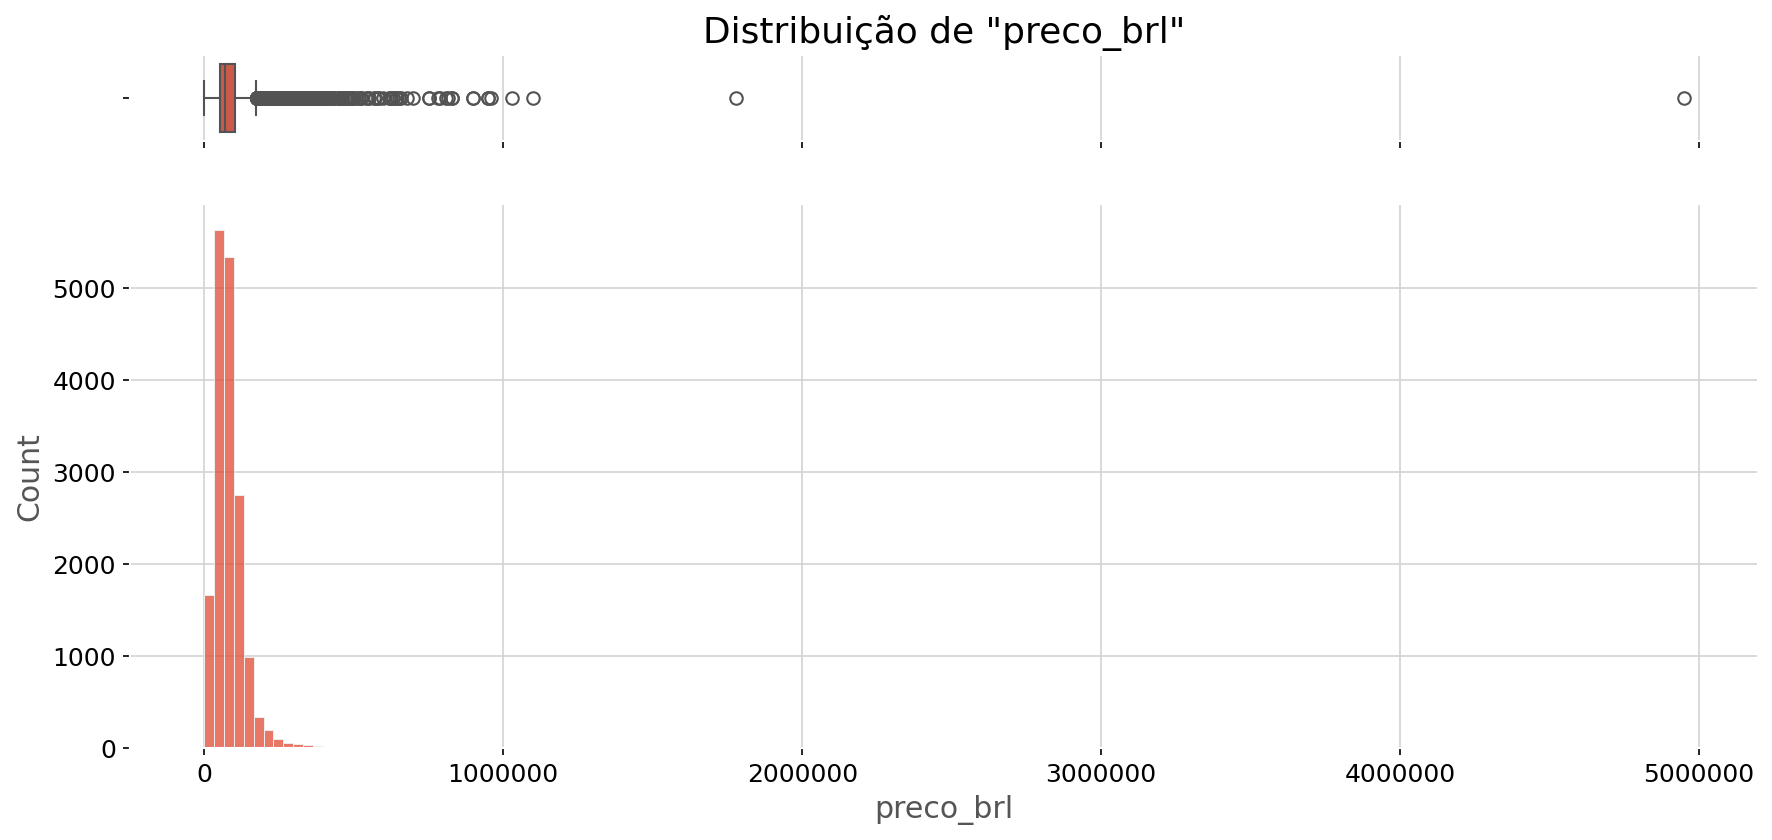

In [50]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .95)})
 
# assigning a graph to each ax
sns.boxplot(data=train, x=target, orient="h", ax=ax_box)
sns.histplot(data=train, x=target, ax=ax_hist, bins=150)
 
# Remove x axis name for the boxplot
ax_box.set_title(label='Distribuição de "preco_brl"')
plt.ticklabel_format(style='plain', axis='x')
ax_box.set(xlabel='')
plt.show()

Há evidentemente valores descrepantes nos preços
*   A base possui **um único** veículo com o preço de aproximadamente 5 milhões de reais.

#### **Demais variáveis numéricas:**

Analisando a distribuição das variáveis numéricas.

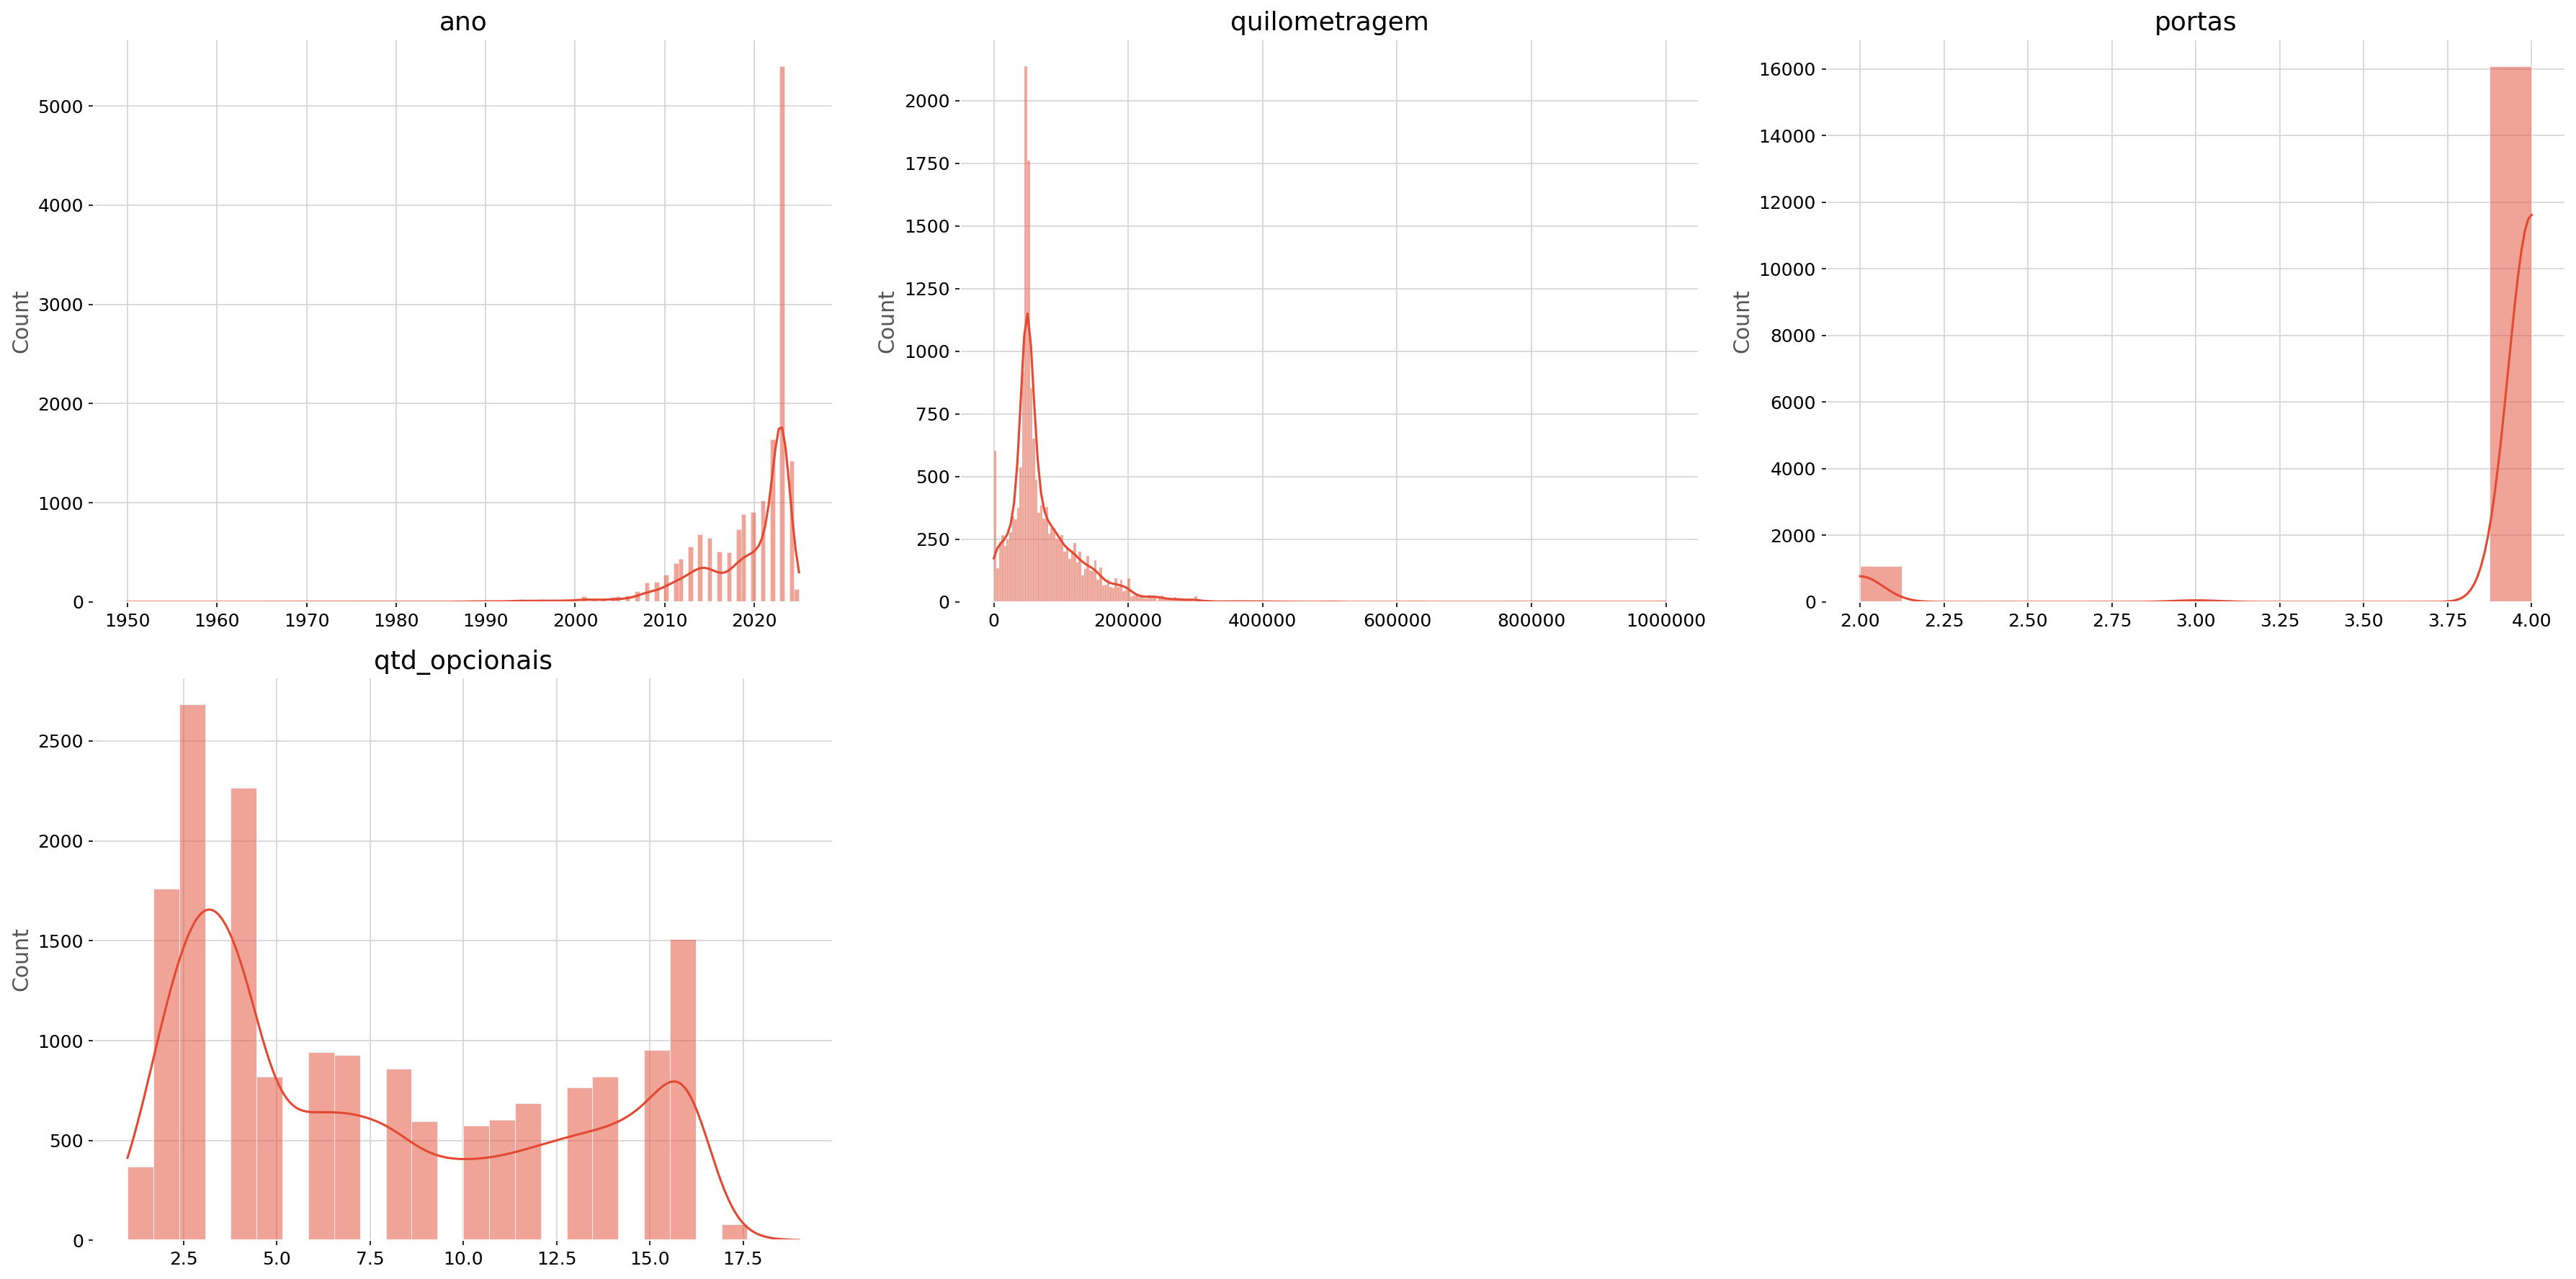

In [51]:
eda_tool.make_eda_plots(data=train, features=num_features, kde=True)


#### **Outliers**
Averiguando a ocorrência de outliers

In [52]:
eda_tool.check_outliers(train, num_features)

Há 2782 outliers no dataset.

Quantidade e porcentagem outliers por feature: 

ano: 510 (2.96)%
quilometragem: 1134 (6.58)%
portas: 1138 (6.61)%
qtd_opcionais: 0 (0.0)%


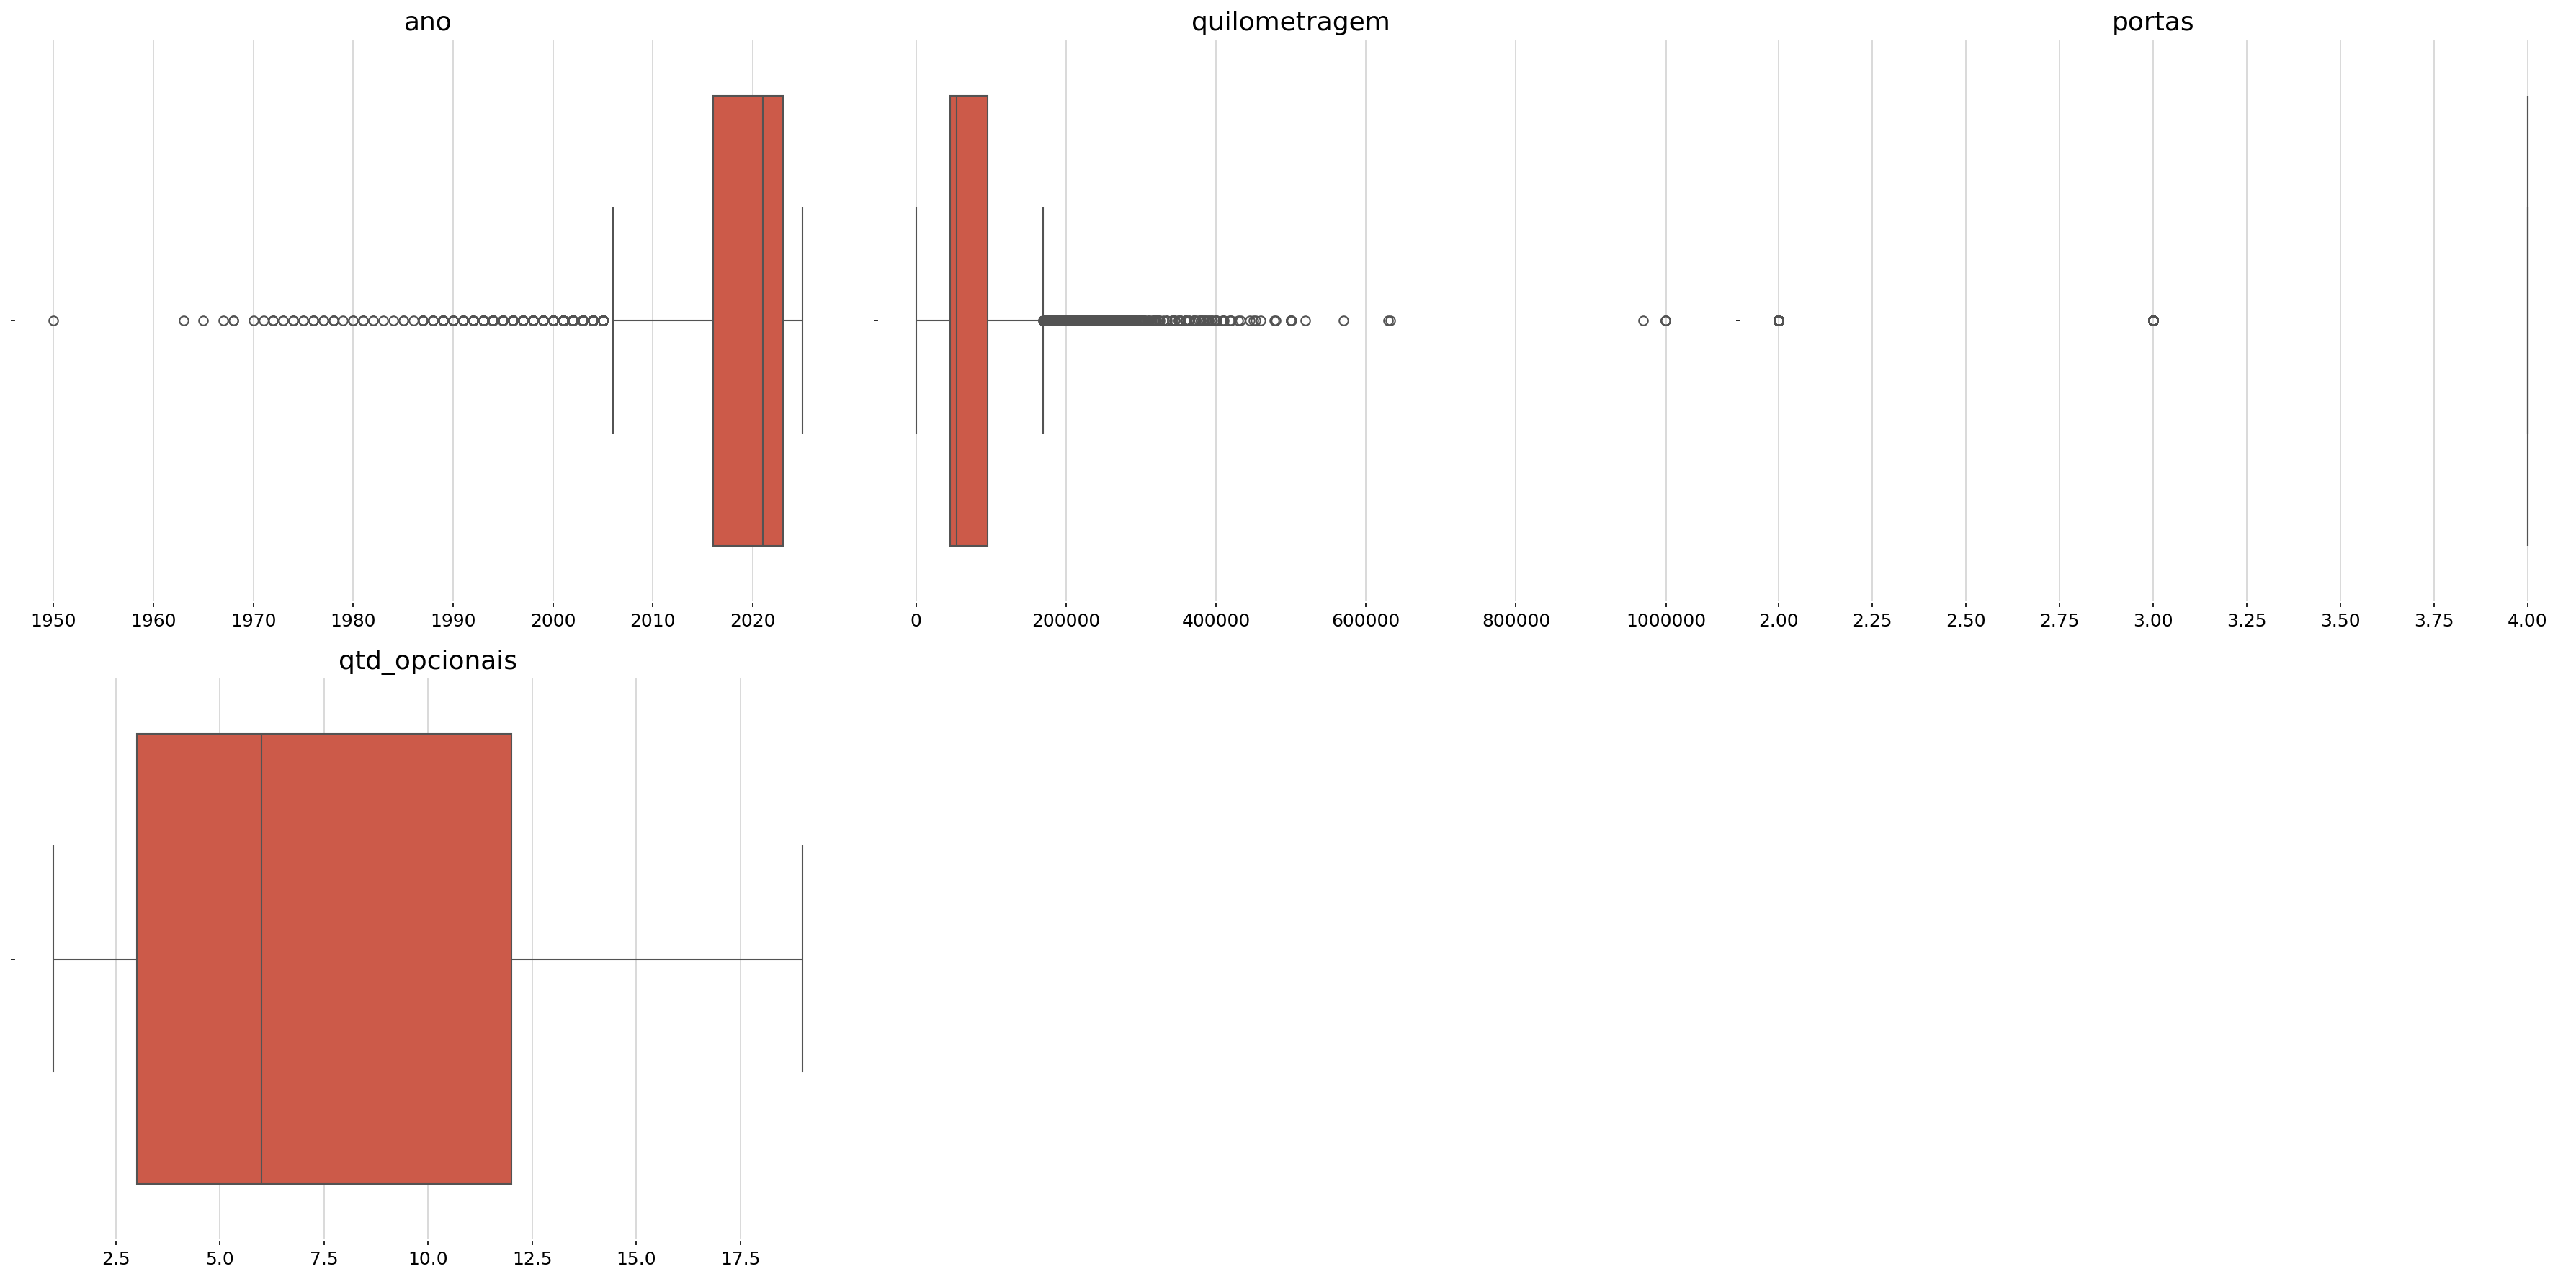

In [53]:
eda_tool.make_eda_plots(data=train, features=num_features, kind='boxplot')

In [54]:
train['portas'].value_counts()

portas
4    16086
2     1069
3       69
Name: count, dtype: int64

*   Embora `portas` apresente outliers, os números de portas dos veículos condizem com a realidade, assim como o `ano` de laçamento do veículo, há veículos que foram lançados há **mais de 50 anos** 
*   A variável `quilometragem` também possui outliers.

**INSIGHTS:**
*   Grande parte dos veículos tem **10** `anos` ou menos
*   A maioria possui **4** `portas`


#### **Variáveis categóricas:**

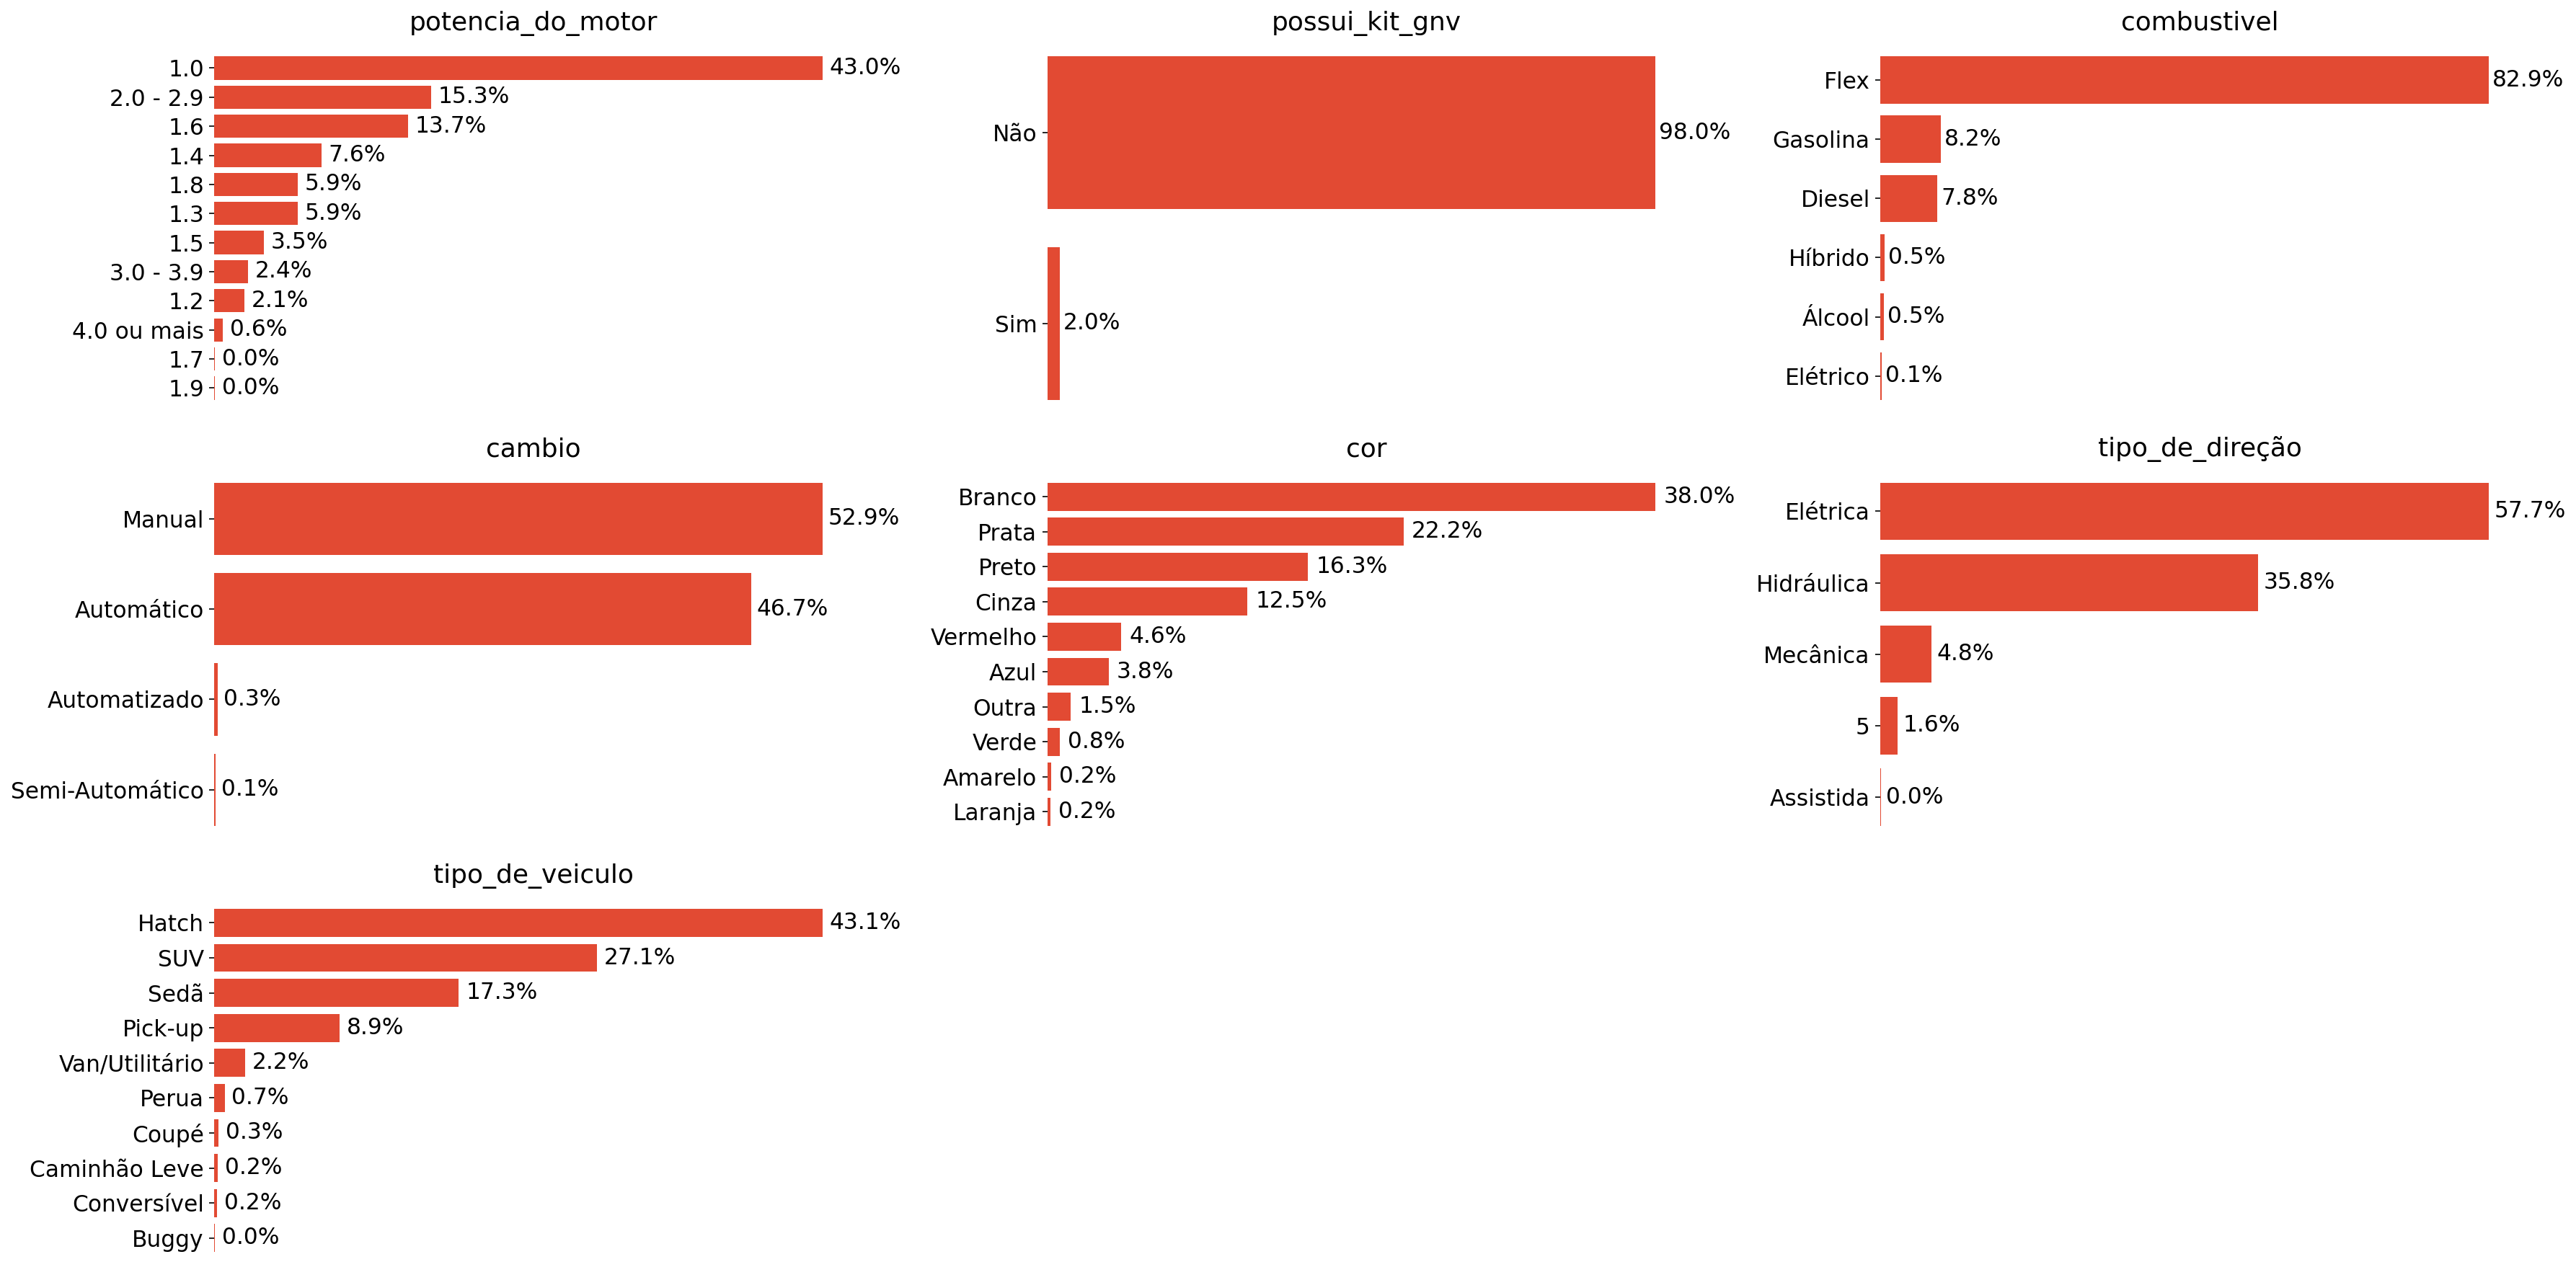

In [146]:
cat_features_to_plot = ['potencia_do_motor', 'possui_kit_gnv', 'combustivel',
                         'cambio', 'cor', 'tipo_de_direção', 'tipo_de_veiculo']

eda_tool.make_eda_plots(data=train, features=cat_features_to_plot, kind='barplot')

Como as variáveis `modelo` e `opcionais`  possuem muitas categorias, irei  plotar os gráficos individualmente.

In [56]:
def plot_top_n(data, feature, N:int=15):  
    top_feature = data[feature].value_counts(normalize=True).head(N).reset_index()\
                               .sort_values(by='proportion', ascending=True)
    # plt.figure(figsize=(18, 12))
    plt.barh(y=top_feature[feature], width=top_feature['proportion'])
    plt.title(f'Top {N} {feature}')
    plt.xlabel('Proporção')
    plt.ylabel(feature.capitalize())
    plt.tight_layout()
    plt.show()

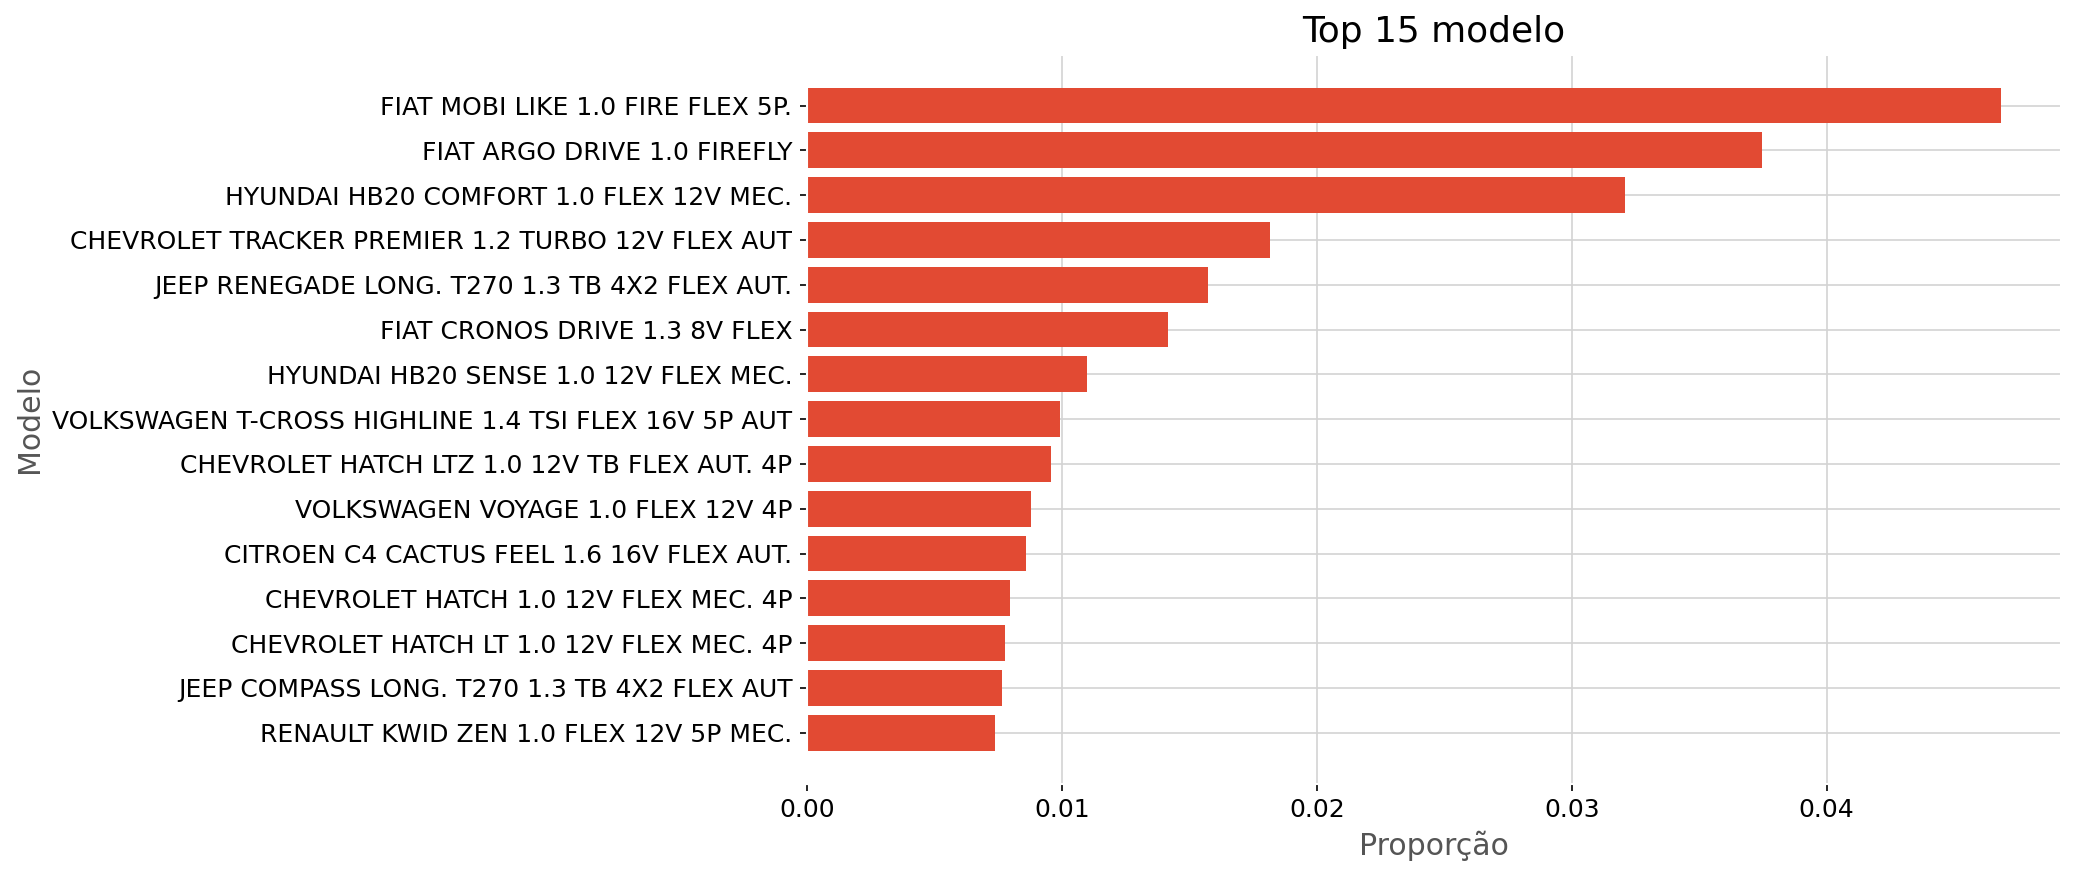

In [57]:
plot_top_n(train, 'modelo', 15)

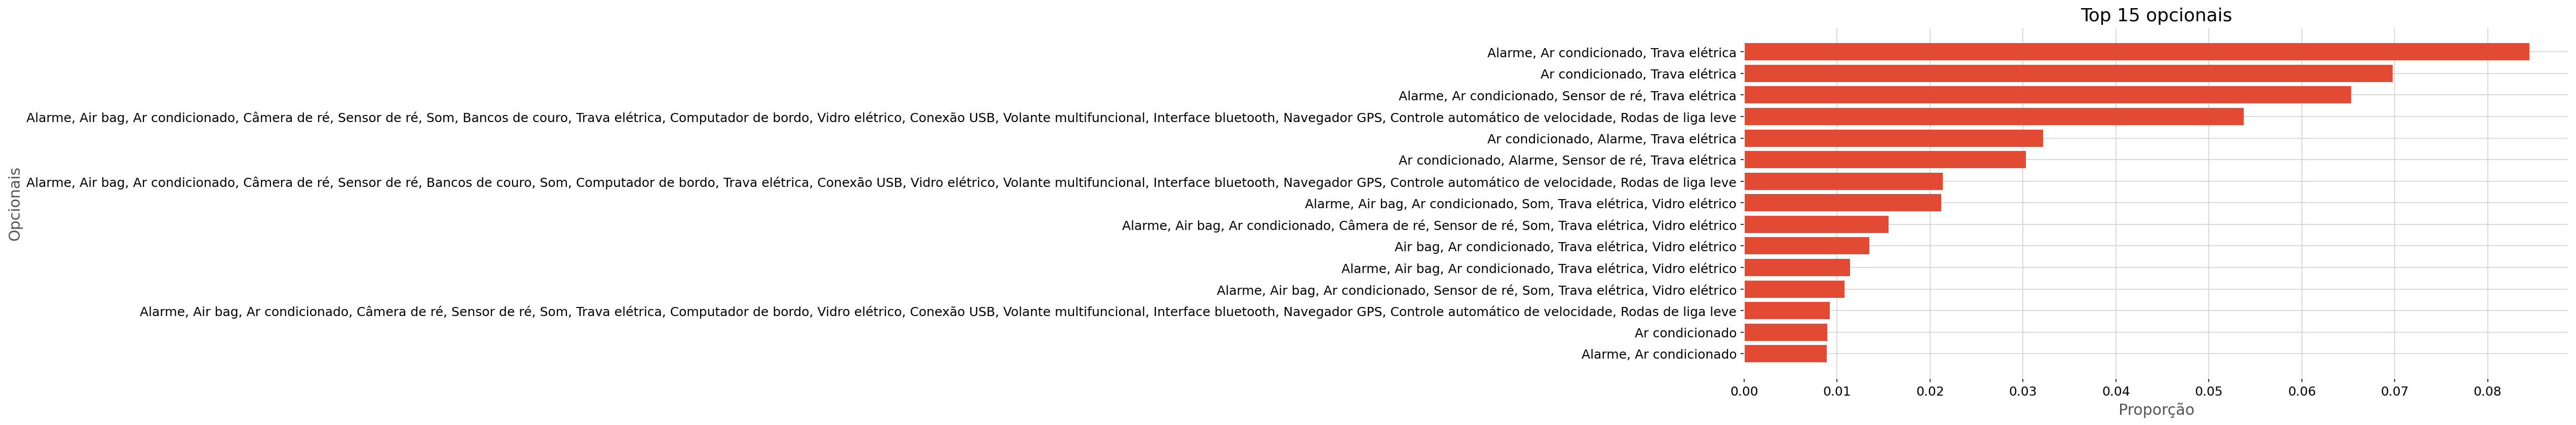

In [58]:
plot_top_n(data=train, feature='opcionais', N=15)

*   Para utilizar a variável `opcionais`  no modelo será necessário realizar algumas alterações.

**INSIGHTS:**
*   Quase a **metade** dos veículos possuem `potência do motor` de até **1.5**
*   Apenas **2%** dos veículos possuem **kit GNV**, essa variável está desbalanceada
*   Aproximadamente **80%** dos veículos usam `combustível` do tipo ***flex***
*   Praticamente **60%**  são veículos com `direção do tipo` ***Elétrica***
*   Aproximadamente a **metade** dos veículos são do `tipo`  **Hatch**

### **Análise Bivariada e Multivariada.**
Irei analisar como as váriáveis ***predictors*** se comportam em relação a nossa variável ***target (preco_brl)***.

#### **Matriz de Correlação**

Vamos analisar a *Matriz de Correlação* e tentar identificar se há alguma correlação entre as variáveis  *predictors* numéricas e tossa variável *target*.

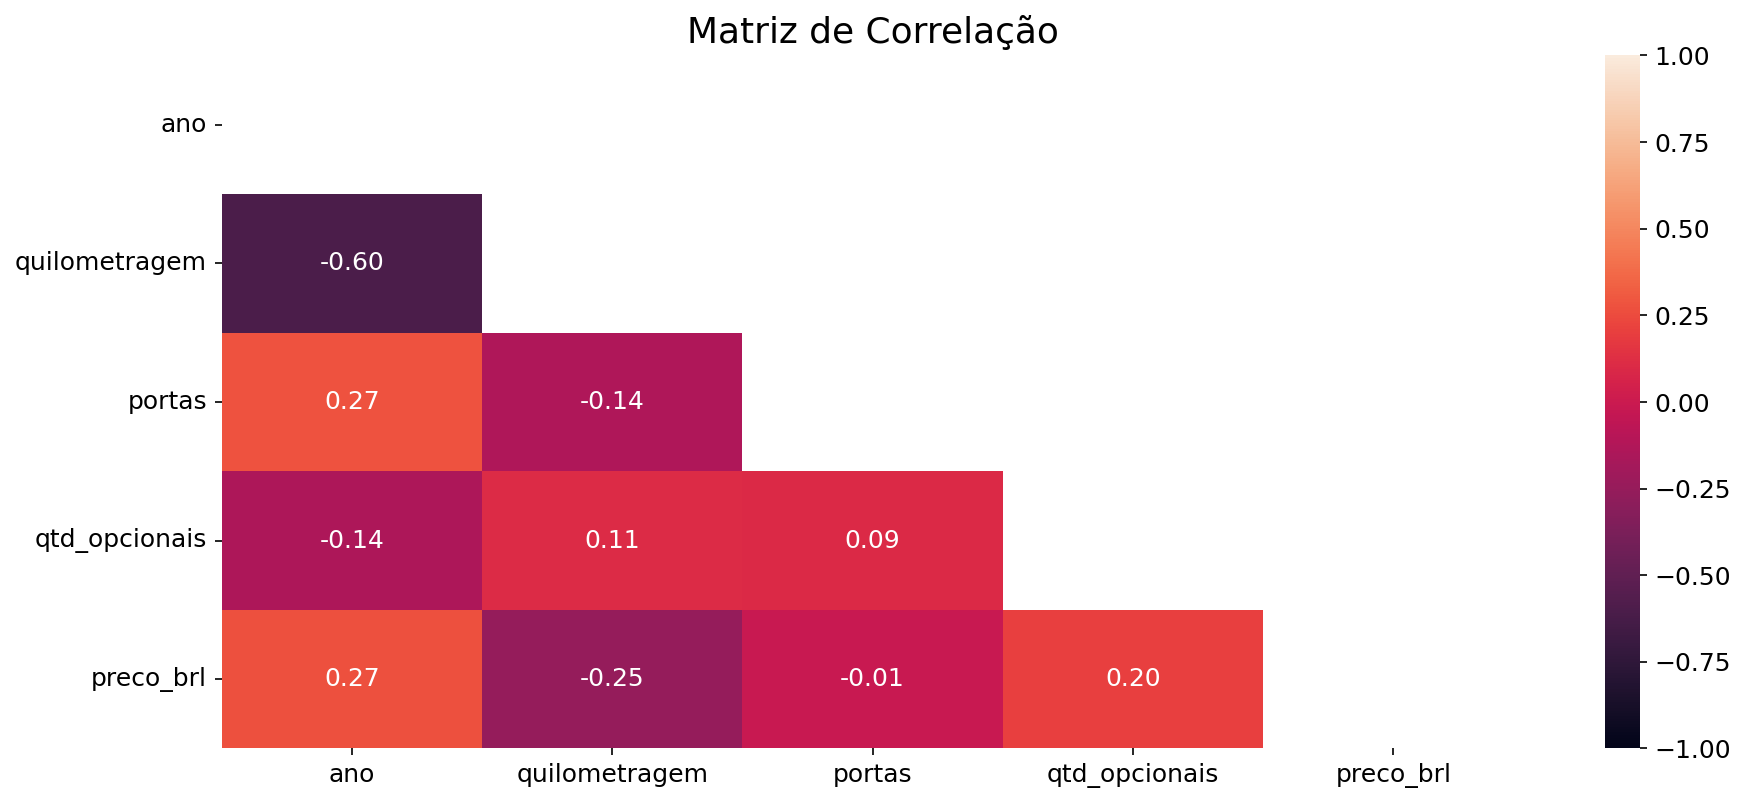

In [111]:
corr = train[num_features + [target]].corr(method='pearson')
mask = np.triu(corr)

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with 'sns.heatmap()'
fig = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", vmax=1, vmin=-1)
fig.grid(False)
plt.title('Matriz de Correlação')
plt.show()

**INSIGHTS:**
*   `ano` e `quilometragem` possuem uma correlação **linear fraca** com a variável target `preco_brl`.
*   `quilometragem` e `ano` são negativamente correlacionadas, o que faz sentido, quanto **mais novo** é o veículo **menos quilômetros** ele já percorreu.

Vamos analisar melhor essas relações:

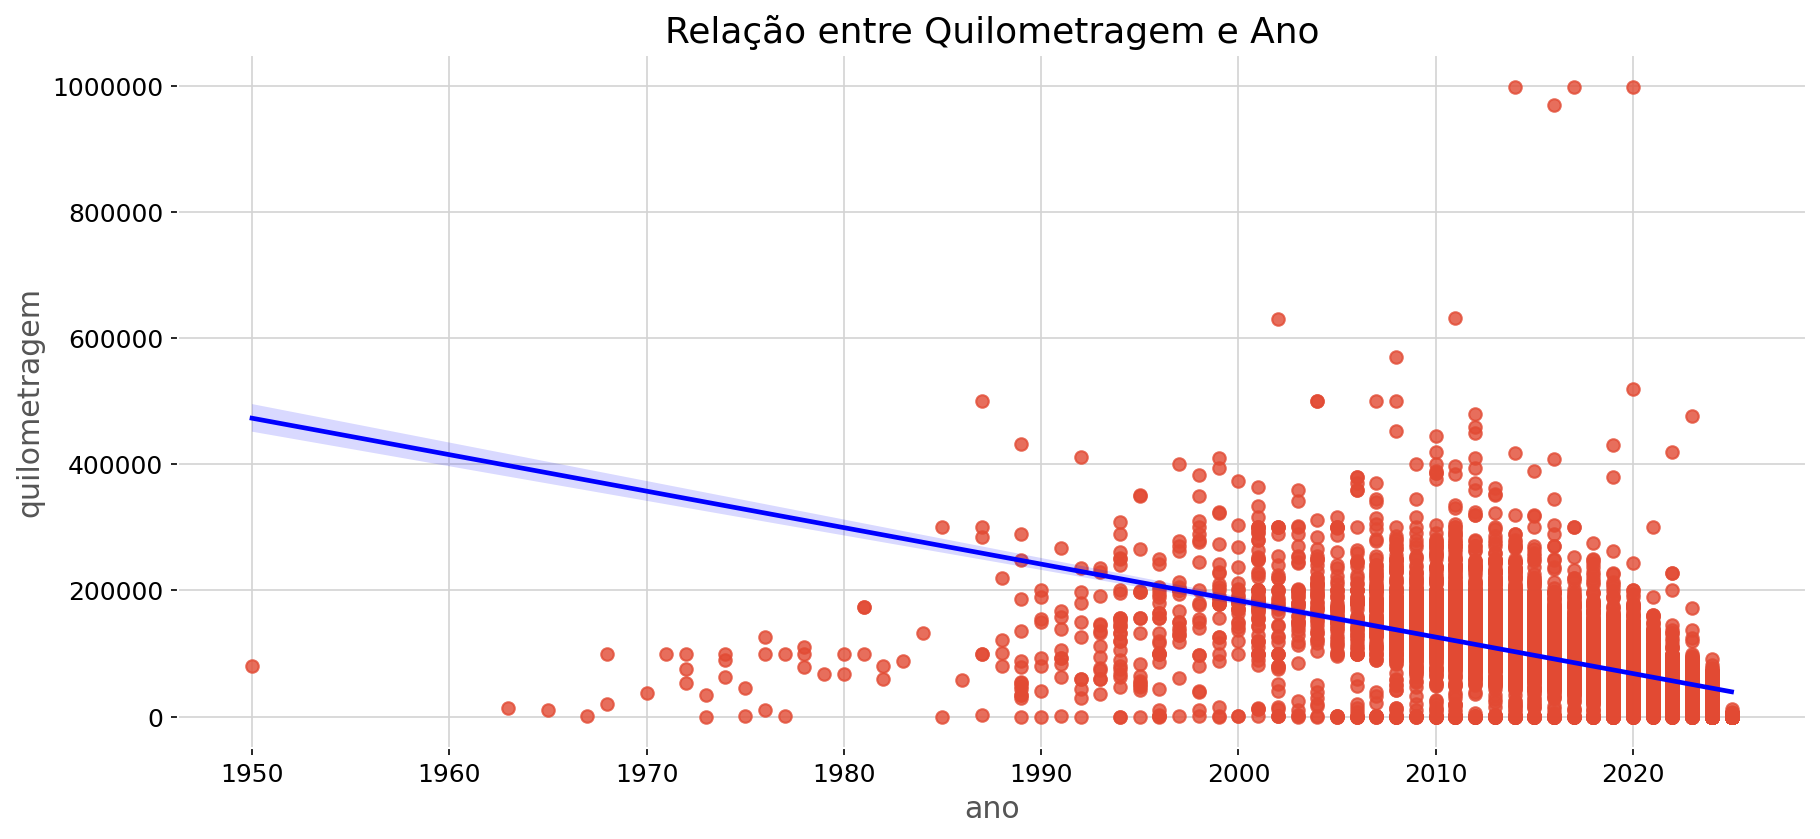

In [101]:
fig = plt.subplots()
sns.regplot(data=train, x='ano', y='quilometragem', line_kws={'color':'blue'})
plt.ticklabel_format(style='plain', axis='y')
plt.title('Relação entre Quilometragem e Ano')
plt.show()

**INSIGHTS:**
*   Curiosamente, alguns dos veículos com **mais quilômetros** rodados possuem **menos de 15 anos** de uso.

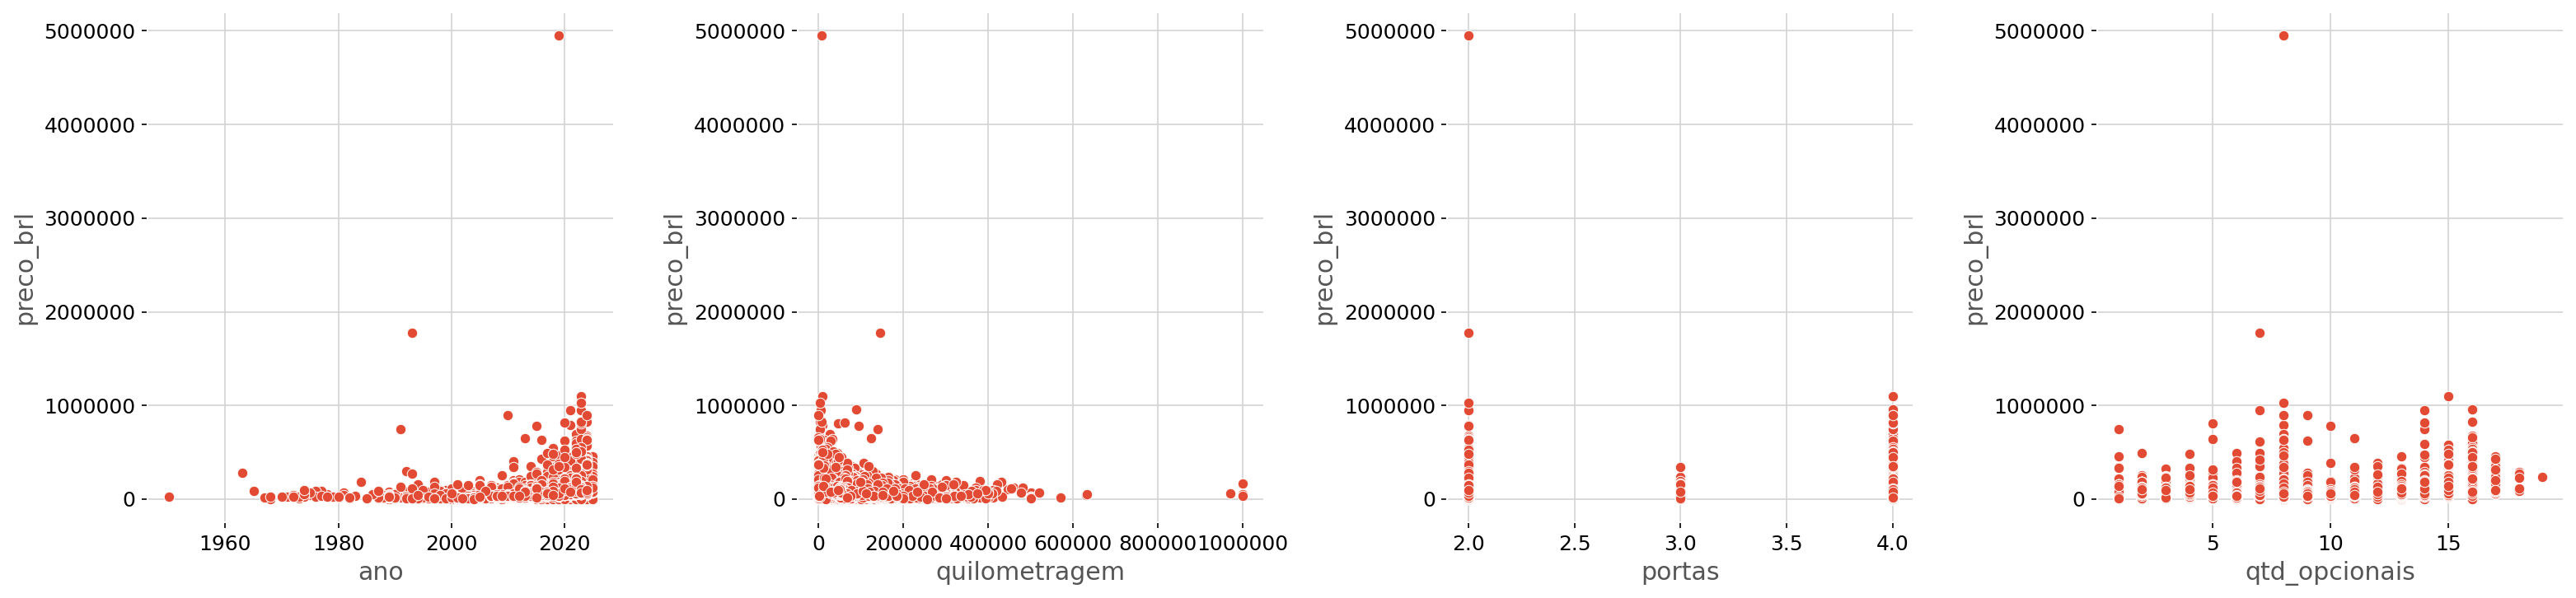

In [107]:
fig, axes = plt.subplots(1, 4, figsize=(21, 5))
sns.scatterplot(data=train, x=num_features[0], y=target, ax=axes[0])
sns.scatterplot(data=train, x=num_features[1], y=target, ax=axes[1])
sns.scatterplot(data=train, x=num_features[2], y=target, ax=axes[2])
sns.scatterplot(data=train, x=num_features[3], y=target, ax=axes[3])
for a in range(len(axes)):
    axes[a].ticklabel_format(style='plain', axis='both')
plt.tight_layout()
plt.show()

**INSIGHTS:**
*   Os gráficos se comportam de maneira esperada de acordo a interpretação do *coeficiente de correlação* visto anteriormente.

#### **Distribuição das variáveis categóricas pela variável *target***
Irei analisar como as **variáveis categóricas** estão distribuidas em relação a nossa variável ***target***

**Preço médio dos veículos por variável:**

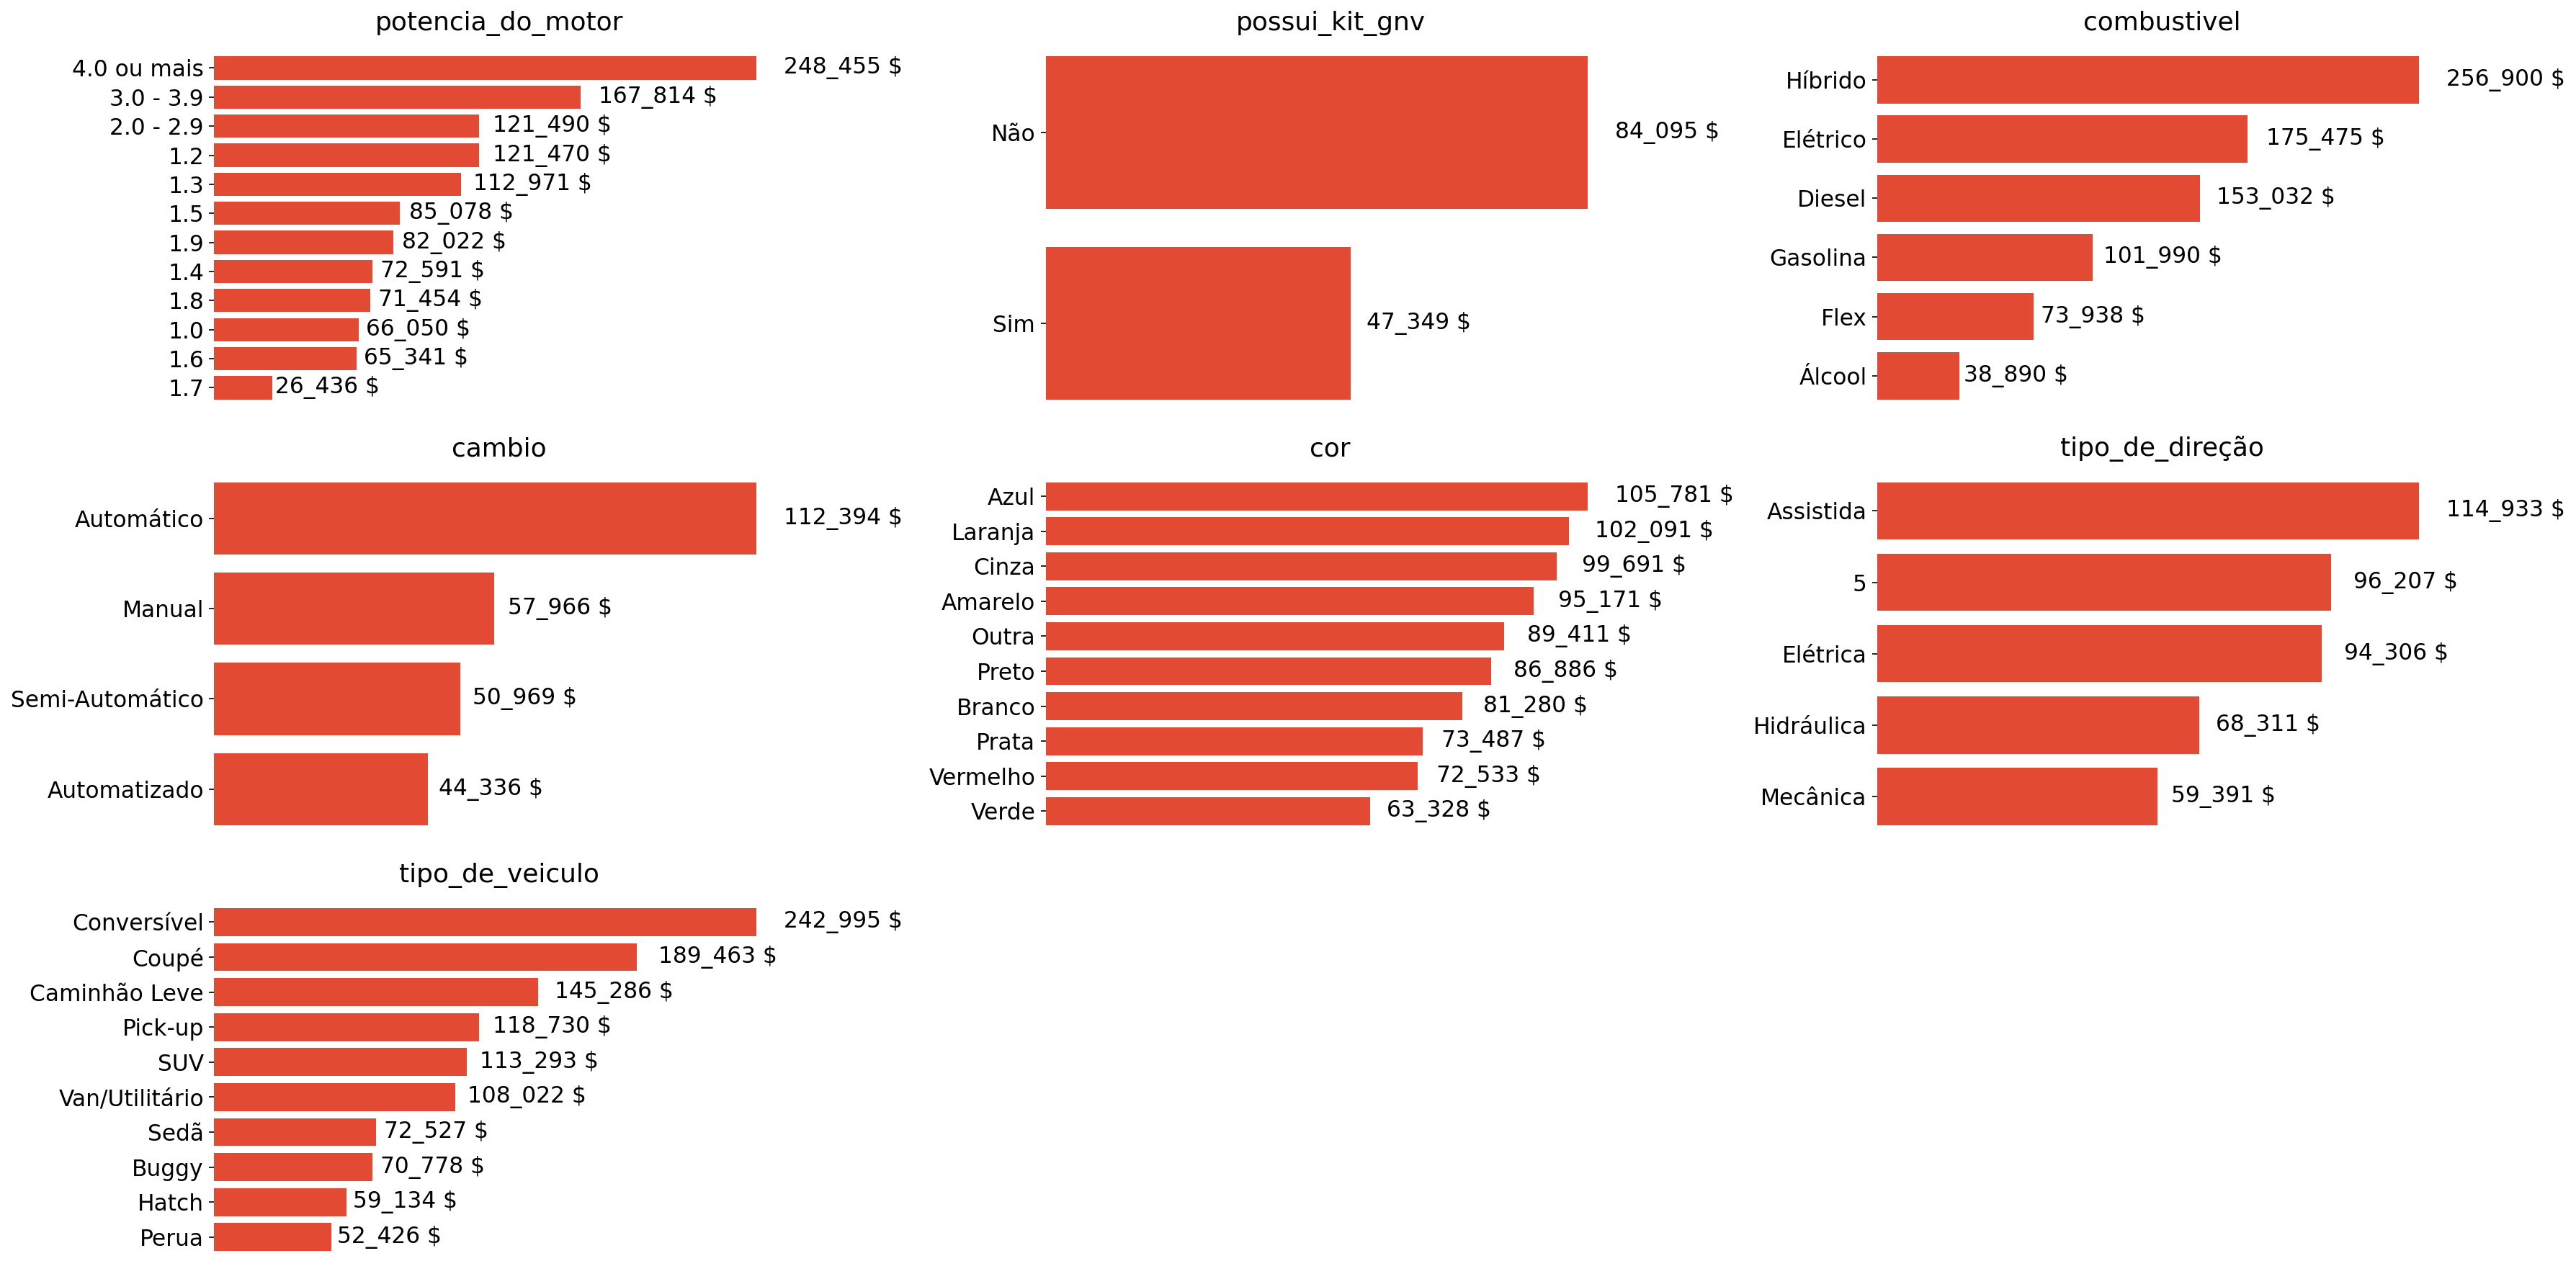

In [148]:
features = cat_features_to_plot
target = target 

eda_tool.make_eda_plots(data=train, features=features, kind='barplot',
                        bar_metric='mean',feature_target=target)